# Изучение  визуализаций с помощью библиотеки seaborn и решение оптимизационной задачи

In [1]:
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit

from scipy.optimize import Bounds,minimize

In [2]:
df = pd.DataFrame({"impressions": [5127, 5127],
                  "clicks": [1145,1250]}, 
                  index = ["A","B"])
df.head()

,impressions,clicks
A,5127,1145
B,5127,1250


In [3]:
df["no_clicks"] = df["impressions"]-df["clicks"]
df = df.drop(["impressions"], axis =1 )
df.head()

,clicks,no_clicks
A,1145,3982
B,1250,3877


In [4]:
result = stats.chi2_contingency(df, correction = False)
chisq, pvalue = result[:2]
print(f"{chisq},{pvalue}")

6.0061905276744785,0.014255771852168957


In [5]:
df = pd.DataFrame ({"Day": list(range(1,11)),
                   'Conversion_A': [0.15,0.12,0.18,0.19,0.17,0.13,0.14,0.23,0.11,0.15],
                   'Conversion_B': [0.19,0.20,0.18,0.22,0.19,0.17,0.18,0.20,0.17,0.22]
                   })
df.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


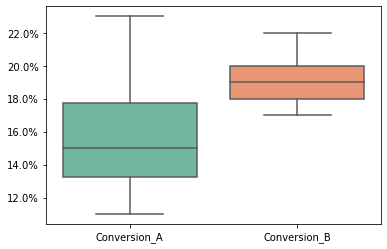

In [6]:
plt.Figure (figsize= (10,7))
ax = sns.boxplot ( data = df[["Conversion_A","Conversion_B"]],palette = 'Set2')
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [7]:
t_stat, p_val = stats.ttest_ind(df["Conversion_A"],df['Conversion_B'])
print(f"{t_stat = },{p_val}")

t_stat = -2.7321154763851614,0.013684259842725968


In [8]:
def value(x):
    return - 10*x[0] - 20*x[1] - 30*x[2]

In [9]:
neq_cons = {"type":"ineq",
           "fun": lambda x: np.array ([600 -10*x[0] - 20*x[1] - 30*x[2],
                                     300 -7*x[0] - 15*x[1] - 20*x[2],
                                      150 -10*x[0] - 10*x[1] - 15*x[2]])
           }

In [10]:
bnds = Bounds([0,0,0],[np.inf,np.inf,np.inf])

In [11]:
x0 = np.array([10, 10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[5.57065505e-12 6.92307692e+00 5.38461538e+00]


In [12]:
print('Джуны:', 5 * 10 + 6 * 20 + 5 * 30, 'чел, час')
print('Мидл:', 6 * 7 + 7 * 15 + 5 * 20, 'чел, час')
print('Сеньор:', 5 * 5 + 6 * 10 + 6 * 15, 'чел, час')
print('Максимальная прибыль:', -1*value([6, 7, 5]),'тыс.руб')

Джуны: 320 чел, час
Мидл: 247 чел, час
Сеньор: 175 чел, час
Максимальная прибыль: 350 тыс.руб


In [13]:
df = pd.DataFrame({"day": [0,1,7,14,21,30],
                 "retained": [100,55,38,26,21,14]})
df.head()

,day,retained
0,0,100
1,1,55
2,7,38
3,14,26
4,21,21


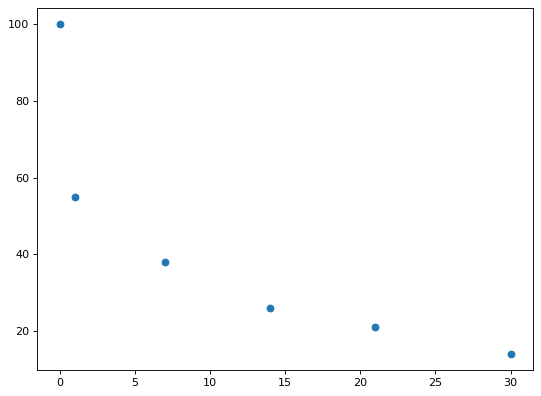

In [14]:
plt.figure(num = None, figsize=(8,6), dpi = 80 ,facecolor="w",edgecolor="k")
plt.scatter(df.day,df.retained,label = 'Original Data')

In [15]:
def log_func(x,a,b,c):
    return - a*np.log2(b+x)+c

In [16]:
def exp_func( x, a, b, c ):
    return a * np.exp( -b * x ) + c

In [17]:
log_popt, log_pcov = curve_fit(log_func,df['day'],df['retained'])

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['retained'])

In [19]:
projection_endpoint = 90

In [20]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = exp_func( np.arange( projection_endpoint ), *exp_popt )

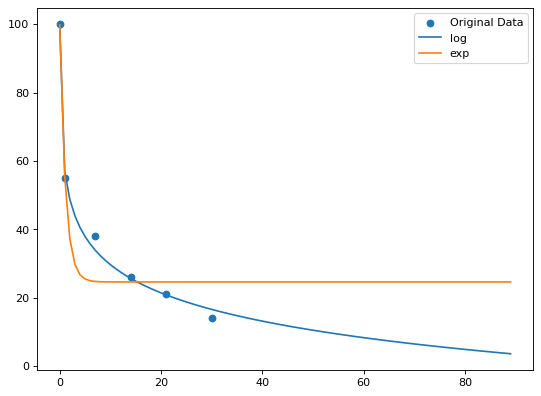

In [21]:
plt.figure(num = None, figsize=(8,6), dpi = 80 ,facecolor="w",edgecolor="k")
plt.scatter(df.day,df.retained,label = 'Original Data')
plt.plot(log_y_projected,label = "log")
plt.plot(exp_y_projected,label = "exp")
plt.legend()
plt.show()

In [22]:
print(round(log_y_projected[89],0))

4.0


Задание №3

In [23]:
df = pd.DataFrame({"day": [1,3,7,14,21,30],
                 "finance": [0.4,0.6,0.8,1.10,1.30,1.40]})
df.head()

,day,finance
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3


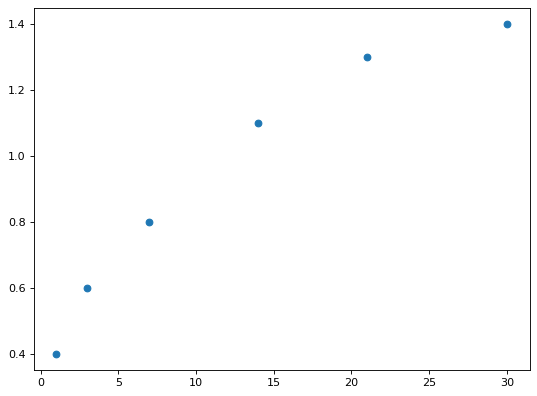

In [24]:
plt.figure(num = None, figsize=(8,6), dpi = 80 ,facecolor="w",edgecolor="k")
plt.scatter(df.day,df.finance,label = 'Original Data')

In [25]:
def func_1(x,a,b):
    return - a*(b**x)

In [26]:
def ln_func(x,a,b):
    return - a*np.log(x) + b

In [27]:
f1_popt, f1_pcov = curve_fit(func_1,df['day'],df['finance'])

In [28]:
ln_popt, ln_pcov = curve_fit(ln_func,df['day'],df['finance'])

In [29]:
projection_endpoint = 90

In [30]:
f1_y_projected = func_1( np.arange( projection_endpoint ), *f1_popt )
ln_y_projected = ln_func( np.arange( projection_endpoint ), *ln_popt )

C:\Users\Данил\AppData\Local\Temp\ipykernel_14456\1129090278.py:2: RuntimeWarning: divide by zero encountered in log
  return - a*np.log(x) + b


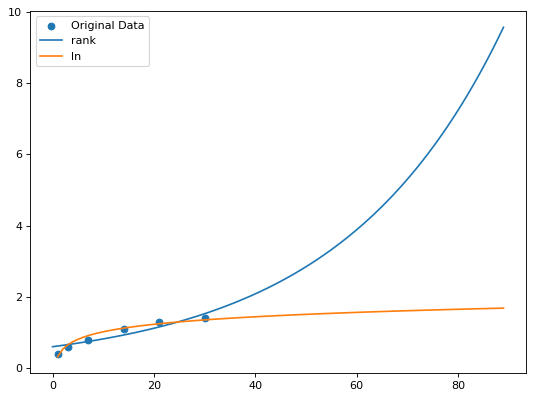

In [31]:
plt.figure(num = None, figsize=(8,6), dpi = 80 ,facecolor="w",edgecolor="k")
plt.scatter(df.day,df.finance,label = 'Original Data')
plt.plot(f1_y_projected,label = "rank")
plt.plot(ln_y_projected,label = "ln")
plt.legend()
plt.show()

In [33]:
print(f"Наиболее подходит лограрифмическая функция")
print(round(ln_y_projected[89],0))

Наиболее подходит лограрифмическая функция
2.0


In [34]:
def value(x):
    return - 45*x[0] - 80*x[1] 

In [35]:
neq_cons = {"type":"ineq",
           "fun": lambda x: np.array ([400 -5*x[0] - 20*x[1] ,
                                     450 -10*x[0] - 15*x[1] ])
           }

In [36]:
bnds = Bounds([0,0],[np.inf,np.inf])

In [37]:
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [39]:
print(f"необходимо сделать {round(res.x[0])} стульев и {round(res.x[1])} столов для получения максимальной прибыли")

необходимо сделать 24 стульев и 14 столов
